# Airbnb

Airbnb, Inc. is an online marketplace for organizing or offering accommodation. The company was founded after the creators installed an air mattress in their living room, essentially transforming their apartment into a bed and breakfast in order to account for the high cost of rent in San Francisco. Airbnb is a simplified version of its original name, AirBedandBreakfast.com.

In this project we are going to use the CRISP - DM technique to answer a few questions:

1. What are the best months to find cheap accommodations in Boston?
2. What are the most least expensive neighborhoods and the most expensive neighborhood in Boston?
3. Which are the few best rated accommodations in Boston?
4. What type of accommodation do guests prefer the most?

# IMPORT

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Reading the Data

In [62]:
calendar = pd.read_csv("data/calendar.csv")
listings = pd.read_csv("data/listings.csv")
reviews = pd.read_csv("data/reviews.csv")

In [63]:
print("reviews : ", reviews.shape)

print("listings : ", listings.shape)

print("calendar : ", calendar.shape)

reviews :  (68275, 6)
listings :  (3585, 95)
calendar :  (1048575, 4)


## Analyzing the Data

In [64]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [65]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [66]:
calendar.head()

,listing_id,date,available,price
0,12147973,05-09-2017,f,NaN
1,12147973,04-09-2017,f,NaN
2,12147973,03-09-2017,f,NaN
3,12147973,02-09-2017,f,NaN
4,12147973,01-09-2017,f,NaN


In [67]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1048575 non-null  int64 
 1   date        1048575 non-null  object
 2   available   1048575 non-null  object
 3   price       514688 non-null   object
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


In [68]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [69]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [70]:
calendar.head()

,listing_id,date,available,price
0,12147973,05-09-2017,f,NaN
1,12147973,04-09-2017,f,NaN
2,12147973,03-09-2017,f,NaN
3,12147973,02-09-2017,f,NaN
4,12147973,01-09-2017,f,NaN


In [71]:
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')

calendar['price'] = calendar['price'].astype(float)


In [72]:
calendar['available'] = calendar['available'] == 't'

In [73]:
calendar.head()

,listing_id,date,available,price
0,12147973,05-09-2017,False,NaN
1,12147973,04-09-2017,False,NaN
2,12147973,03-09-2017,False,NaN
3,12147973,02-09-2017,False,NaN
4,12147973,01-09-2017,False,NaN


In [74]:
calendar.dtypes

listing_id      int64
date           object
available        bool
price         float64
dtype: object

In [75]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [76]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [77]:
calendar['month'] = pd.DatetimeIndex(calendar['date']).month.astype(int)
calendar['year'] = pd.DatetimeIndex(calendar['date']).year.astype(int)
calendar=calendar[['listing_id','date','available', 'price','month','year']]
calendar = calendar.dropna(subset=['price'])

In [78]:
calendar.head()

,listing_id,date,available,price,month,year
365,3075044,2017-08-22,True,65.0,8,2017
366,3075044,2017-08-21,True,65.0,8,2017
367,3075044,2017-08-20,True,65.0,8,2017
368,3075044,2017-08-19,True,75.0,8,2017
369,3075044,2017-08-18,True,75.0,8,2017


In [79]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [80]:
listings['neighbourhood'].value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Brookline               8
Leather District        8
Downtown                8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

In [98]:
# Writing a function that imputes median
def filldata(series):    
    ''' Here in the function the median is imputed  '''
    return series.fillna(series.median()) * 100
    

### Q What have I done in the above function?
#### ANS There are many ways of removing Nan values, You can either simply drop them or you can impute it with some value. Several values such as mean, median are used to impute in place of the Nan values. 


### Q Why have I used median to impute values?
#### ANS Since dropping the nan value would have created the data set bias, I had to impute values. Median was the best approach for imputing values as it gave more accuracy. Since the data set is strongly skewed, the mean may not give an accurate representation of central tendency.

In [99]:
listings_nn = listings[['id','name','summary','price','review_scores_rating','number_of_reviews']]
listings_nn.head()

,id,name,summary,price,review_scores_rating,number_of_reviews
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",$250.00,NaN,0
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,$65.00,94.0,36
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",$65.00,98.0,41
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,$75.00,100.0,1
4,7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...",$79.00,99.0,29


In [100]:
listings_nh = listings[['id','neighbourhood']]

In [101]:
listings_nh.head()

,id,neighbourhood
0,12147973,Roslindale
1,3075044,Roslindale
2,6976,Roslindale
3,1436513,NaN
4,7651065,Roslindale


In [85]:
listings_nh = listings_nh.rename(columns={"id": "listing_id"})
listings_calendar = pd.merge(calendar, listings_nh, on=['listing_id','listing_id'])

In [86]:
listings_calendar.head()

,listing_id,date,available,price,month,year,neighbourhood
0,3075044,2017-08-22,True,65.0,8,2017,Roslindale
1,3075044,2017-08-21,True,65.0,8,2017,Roslindale
2,3075044,2017-08-20,True,65.0,8,2017,Roslindale
3,3075044,2017-08-19,True,75.0,8,2017,Roslindale
4,3075044,2017-08-18,True,75.0,8,2017,Roslindale


In [87]:
listings_calendar.dtypes

listing_id                int64
date             datetime64[ns]
available                  bool
price                   float64
month                     int64
year                      int64
neighbourhood            object
dtype: object

In [88]:
listings_calendar['neighbourhood'] = listings_calendar['neighbourhood'].astype('category')

In [89]:
listings_calendar.dtypes

listing_id                int64
date             datetime64[ns]
available                  bool
price                   float64
month                     int64
year                      int64
neighbourhood          category
dtype: object

In [90]:
listings_calendar.neighbourhood.unique().tolist()

['Roslindale',
 nan,
 'Jamaica Plain',
 'Mission Hill',
 'Fenway/Kenmore',
 'Back Bay',
 'Leather District',
 'Chinatown',
 'Hyde Park',
 'North End',
 'Roxbury',
 'South End',
 'East Boston',
 'South Boston',
 'Charlestown',
 'West End',
 'Beacon Hill',
 'Theater District',
 'Downtown Crossing',
 'Downtown',
 'Financial District',
 'Government Center',
 'Allston-Brighton',
 'West Roxbury',
 'Chestnut Hill',
 'Mattapan',
 'Dorchester']

In [91]:
# List of months for visualizations
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [92]:
avg_price_per_night_by_month = listings_calendar.groupby(listings_calendar['date'].dt.strftime('%m'))['price'].mean()
avg_price_per_night_by_month = pd.DataFrame(avg_price_per_night_by_month).reset_index()
avg_price_per_night_by_month['date'] = avg_price_per_night_by_month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)

### Q1. What are the best months to find cheap accommodations in Boston?

In [93]:
avg_price_per_night_by_month

,date,price
0,Jan,195.409753
1,Feb,195.123324
2,Mar,195.909779
3,Apr,210.029389
4,May,203.612913
5,Jun,205.856854
6,Jul,211.395187
7,Aug,211.182155
8,Sep,234.339128
9,Oct,229.703409


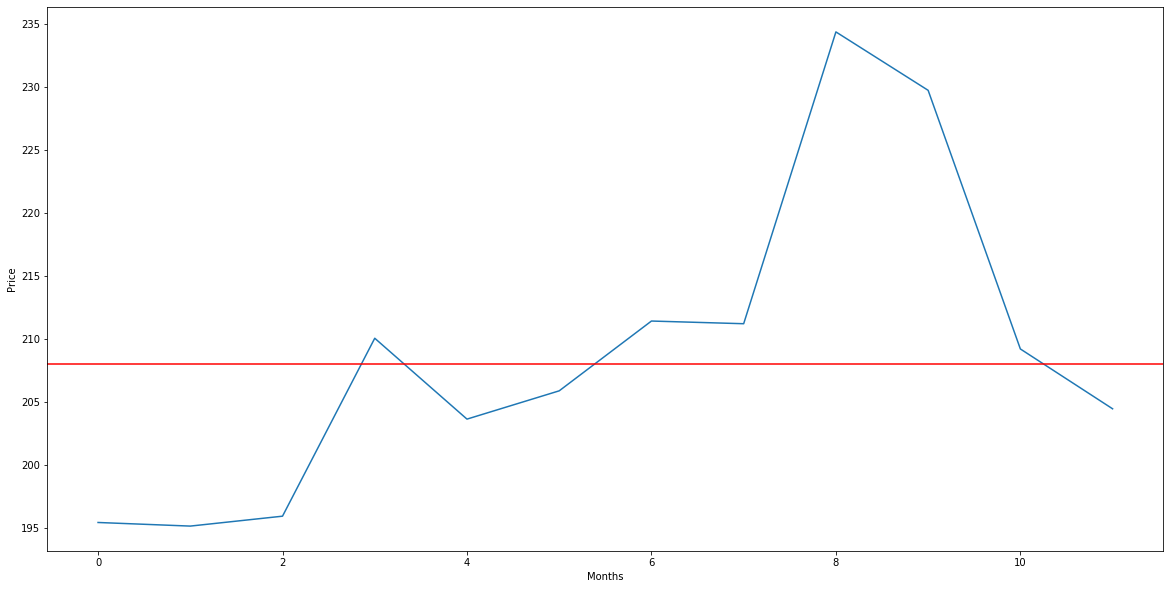

In [94]:
plt.figure(figsize=(20,10))
plt.plot(avg_price_per_night_by_month['price'])
plt.xlabel("Months") 
plt.ylabel("Price")
plt.axhline(calendar['price'].mean(),color='Red',label='Avg for Year')
plt.savefig('average price for month')
plt.show()

### Q2. What are the least expensive neighborhoods and the most expensive neighborhood in Boston?

In [95]:
listings_calendar.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

neighbourhood
Hyde Park              73.465603
Dorchester             78.606696
South Boston           84.717472
Chestnut Hill          84.797688
Mattapan               94.106238
Roslindale             95.783921
West Roxbury          126.005327
Allston-Brighton      143.110963
East Boston           147.689503
Downtown              151.604509
Jamaica Plain         158.740517
Roxbury               167.535162
Mission Hill          171.634085
Theater District      200.627595
Charlestown           220.056090
North End             229.789114
South End             237.768543
Beacon Hill           244.170634
Leather District      284.532149
Back Bay              286.039521
Fenway/Kenmore        306.799834
West End              320.444520
Government Center     327.762457
Downtown Crossing     330.866325
Chinatown             341.990203
Financial District    441.700146
Name: price, dtype: float64

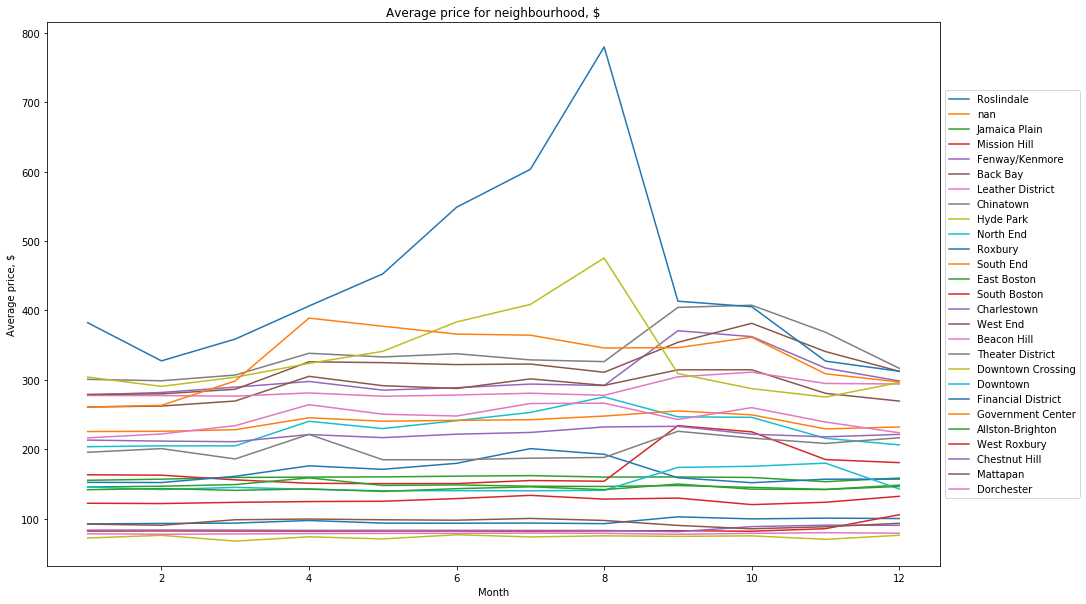

In [36]:
#get list of neighbourhoods
neighbourhoods = listings_calendar['neighbourhood'].unique()

#get prices by month and neighbourhood
price_by_month_neighbourhood = listings_calendar.groupby(['month','neighbourhood']).mean().reset_index()

#plot prices for each neighbourhood
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood'] == neighbourhood]['month'],
             price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price for neighbourhood, $')

plt.savefig('average price for neighbourhood')

plt.show()


### Q3. Which are the few best rated accommodations in Boston?

In [102]:
reviews=listings_nn.sort_values(by=['review_scores_rating'],ascending=False).head(500)
reviews

,id,name,summary,price,review_scores_rating,number_of_reviews
2752,9826706,Baker Chocolate Factory,Beautiful studio apartment with vaulted ceilin...,$75.00,100.0,3
967,8082512,"Columbus Ave By Maverick,ThirtyFour","The unit is stylishly designed for comfort, va...",$137.00,100.0,1
2703,13487348,Private room in attic,My place is good for solo adventurers.,$60.00,100.0,1
2701,1757417,Queen in Arts & Crafts Bungalow,Relax in our 1912 Arts & Crafts bungalow in th...,$60.00,100.0,19
2700,8720673,A HOME AWAY FROM HOME,Nice clean place to stay for a few days,$95.00,100.0,1
...,...,...,...,...,...,...
3241,13866156,Beautiful 1 Bedroom Condo in Ideal Location!,A beautiful up-to date Condo located 1 block f...,$159.00,100.0,1
3242,6640662,444 W 4th St,"2,200 sqft, 3 level, 3 bdrm, 2 bath, newly ren...","$1,000.00",100.0,1
17,13512930,Roslindale Beauty next to Arboretum,"Clean, sunny 1 bedroom in amazing Roslindale V...",$75.00,100.0,1
3244,11474629,Stylish Boston home,"Located just minutes from Downtown, in the hea...",$175.00,100.0,5


### Q4. What type of accommodation do guests prefer the most?

In [97]:
roomdf = listings.groupby('room_type').size()
labels = roomdf.index
values = roomdf.values
fig = px.pie(names=labels, values=values,title='Room Details')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()